In [2]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [3]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

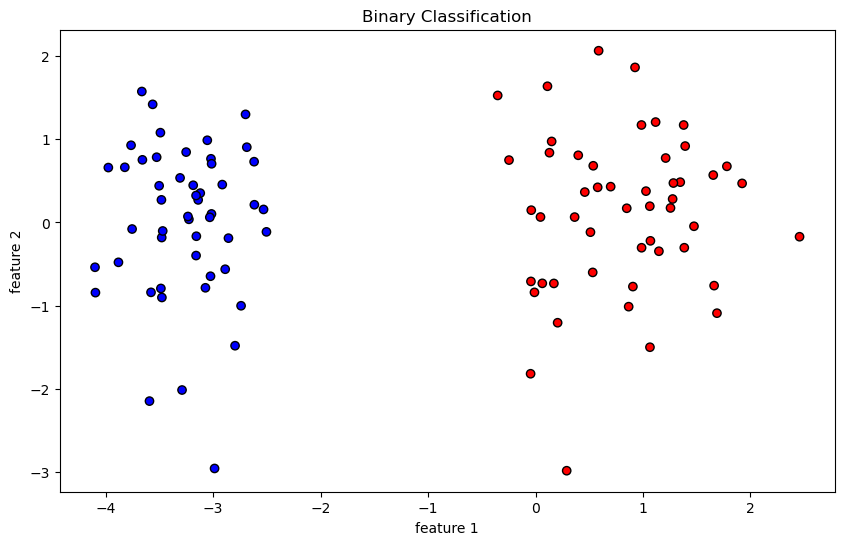

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr',edgecolors = 'k')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Binary Classification')
plt.show()

Coefficients and Intercept Using Scikit-Learn Logistic Regression Class

In [12]:
lr = LogisticRegression(penalty= None)

In [14]:
lr.fit(X, y)

LogisticRegression(penalty=None)

In [35]:
lr.intercept_

array([7.89840729])

In [37]:
lr.coef_

array([[6.16133467, 0.42668242]])

In [41]:
m = -(lr.coef_[0][0]/lr.coef_[0][1])
c = -(lr.intercept_/lr.coef_[0][1])

In [43]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

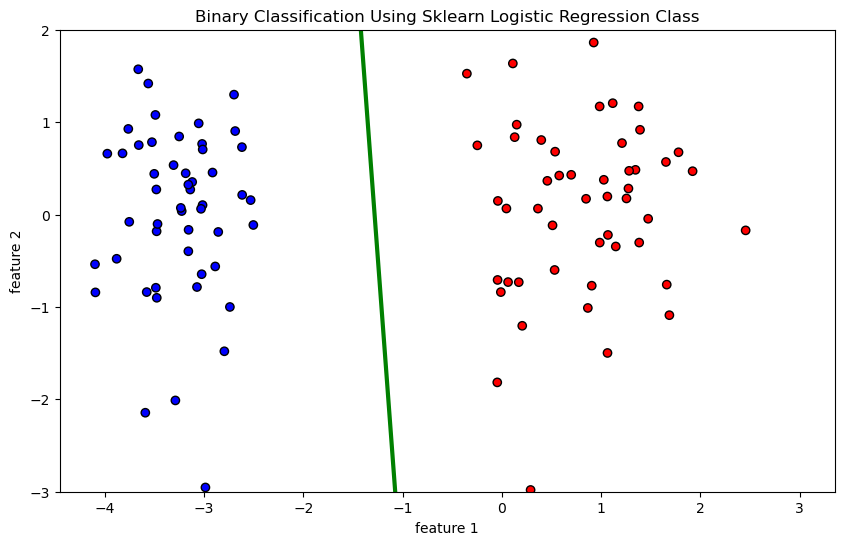

In [49]:
plt.figure(figsize= (10, 6))
plt.plot(x_input, y_input, color = 'green', linewidth = 3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = 'bwr', edgecolor='k')
plt.ylim(-3, 2)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Binary Classification Using Sklearn Logistic Regression Class')
plt.show()

Finding Coefficients and Intercept From Scratch Using Gradient Descent

In [52]:
def SigmoidFunction(z):
    return 1/ (1+ np.exp(-z))

In [152]:
def LogisticRegressionGradientDescent(X, y):
    X = np.insert(X, 0, 1, axis = 1)
    w = np.ones(X.shape[1])
    eta = 0.9
    epochs = 20000

    for i in range(epochs):
        y_hat = SigmoidFunction(np.dot(X, w))
        w = w + eta * (np.dot((y - y_hat), X)/ X.shape[0])

    return w[1:], w[0]

In [154]:
coefficient , intercept = LogisticRegressionGradientDescent(X, y)

In [155]:
coefficient

array([6.27465184, 0.34792511])

In [158]:
intercept

7.857517909360734

In [162]:
m = -(coefficient[0]/coefficient[1])
c = -(intercept/coefficient[1])

In [164]:
x_input_1 = np.linspace( -3, 3, 100)
y_input_1 = m * x_input_1 + c

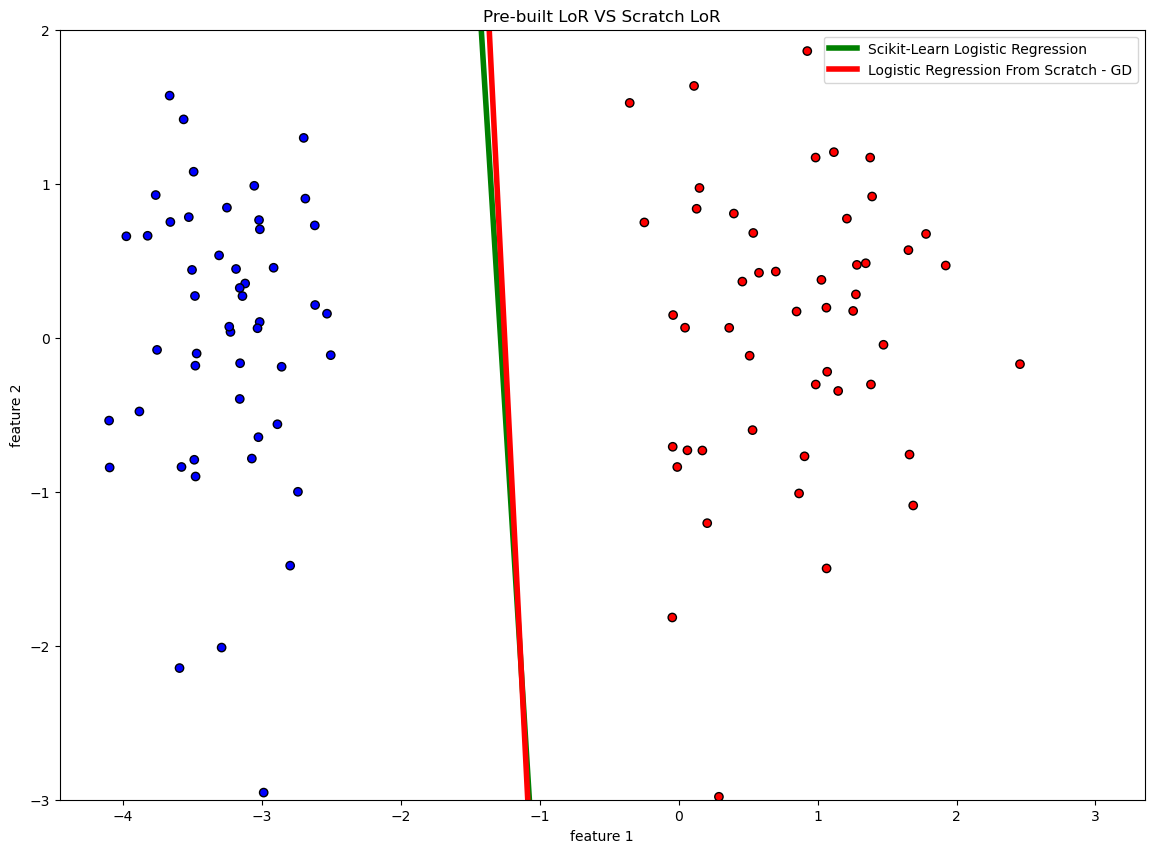

In [206]:
plt.figure(figsize = (14 , 10))
plt.plot(x_input, y_input, color='green', label='Scikit-Learn Logistic Regression', linewidth = 4)
plt.plot(x_input_1, y_input_1, color='red', label='Logistic Regression From Scratch - GD', linewidth = 4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = 'bwr', edgecolor = 'k')
plt.ylim(-3, 2)
plt.title('Pre-built LoR VS Scratch LoR')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()